## 1. Importing required packages

In [8]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.regressor import PredictionError

#To get rid of warnings
import warnings
warnings.filterwarnings("ignore")

# We want our plots to appear in the notebook
%matplotlib inline

## Models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

##  2. Data Exploration

In [9]:
train_data = pd.read_csv("Train_dataset_ - Train_Aug10.csv")
train_data.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [10]:
train_data.info() #Gives Insight about different Attributes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   Index                 7383 non-null   object 
 2   Industry              7383 non-null   object 
 3   VWAP                  7345 non-null   float64
 4   General Index         7321 non-null   float64
 5   NAV                   7322 non-null   float64
 6   P/E Ratio             7149 non-null   float64
 7   Volumes Traded        7115 non-null   float64
 8   Inventory Turnover    6984 non-null   float64
 9   Covid Impact (Beta)   7007 non-null   float64
 10  Tracking Error        7312 non-null   float64
 11  Dollar Exchange Rate  7306 non-null   float64
 12  Put-Call Ratio        7298 non-null   float64
 13  P/B Ratio             7358 non-null   float64
 14  Stock Price           7383 non-null   float64
dtypes: float64(12), objec

### 2.A Filling Missing Values

In [11]:

train_data.isna().sum() #Gives the number of missing values in each column

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

In [12]:
pd.crosstab(train_data['Index'],train_data['Dollar Exchange Rate'])

Dollar Exchange Rate,1.0,17.7,74.9
Index,,,
BSE,0,0,1447
JSE,0,1463,0
NSE,0,0,1484
NYSE,1454,0,0
S&P 500,1458,0,0


Pattern 1 : Index vs. Dollar Exchange Rate The Dollar Exchange Rate values are depended on the Index Column. The Dollar Exchange Rates for the following Indexes are :

NSE : 74.9
NYSE : 1.0
BSE : 74.9
JSE : 17.7
S&P 500 : 1.0

In [13]:
train_data.loc[train_data["Index"]=="NSE",["Dollar Exchange Rate"]]=74.9
train_data.loc[train_data["Index"]=="NYSE",["Dollar Exchange Rate"]]=1.0
train_data.loc[train_data["Index"]=="BSE",["Dollar Exchange Rate"]]=74.9
train_data.loc[train_data["Index"]=="JSE",["Dollar Exchange Rate"]]=17.7
train_data.loc[train_data["Index"]=="S&P 500",["Dollar Exchange Rate"]]=1.0

Pattern 2 : Industry vs. Covid Impact (Beta) 

In [14]:
pd.crosstab(train_data["Industry"],train_data["Covid Impact (Beta)"])

Covid Impact (Beta),-0.43,0.03,0.11,0.23,0.78
Industry,,,,,
Energy,0,0,1431,0,0
Healthcare,0,0,0,0,1359
Information Tech,0,0,0,1389,0
Materials,0,1445,0,0,0
Real Estate,1383,0,0,0,0


In [15]:
train_data.loc[train_data["Industry"]=="Energy",["Covid Impact (Beta)"]]=0.11
train_data.loc[train_data["Industry"]=="Healthcare",["Covid Impact (Beta)"]]=0.78
train_data.loc[train_data["Industry"]=="Information Tech",["Covid Impact (Beta)"]]=0.23
train_data.loc[train_data["Industry"]=="Materials",["Covid Impact (Beta)"]]=0.03
train_data.loc[train_data["Industry"]=="Real Estate",["Covid Impact (Beta)"]]=-0.43

Pattern 3 : Index vs. General Index 

In [16]:
pd.crosstab(train_data["Index"],train_data["General Index"])

General Index,3351.28,11270.15,12765.84,38182.08,55722.00
Index,,,,,
BSE,0,0,0,1453,0
JSE,0,0,0,0,1464
NSE,0,1485,0,0,0
NYSE,0,0,1458,0,0
S&P 500,1461,0,0,0,0


In [17]:
train_data.loc[train_data["Index"]=="BSE",["General Index"]]=38182.08
train_data.loc[train_data["Index"]=="JSE",["General Index"]]=55722.00
train_data.loc[train_data["Index"]=="NSE",["General Index"]]=11270.15
train_data.loc[train_data["Index"]=="NYSE",["General Index"]]=12765.84
train_data.loc[train_data["Index"]=="S&P 500",["General Index"]]=3351.28

In [18]:
train_data.isna().sum() #some values still remaining

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index             0
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)       0
Tracking Error           71
Dollar Exchange Rate      0
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

In [19]:
#Few colums like Volumes Traded, P/E Ratio and etc have high missing data. So below code will fill those missing values
#with the mean of the columns.

In [20]:
train_data["Volumes Traded"].fillna(train_data["Volumes Traded"].mean(), inplace=True)
train_data["Inventory Turnover"].fillna(train_data["Inventory Turnover"].mean() , inplace=True)
train_data["P/E Ratio"].fillna(train_data["P/E Ratio"].mean() , inplace=True)
train_data["NAV"].fillna(train_data["NAV"].mean() , inplace=True)
train_data["Tracking Error"].fillna(train_data["Tracking Error"].mean() , inplace=True)
train_data["Put-Call Ratio"].fillna(train_data["Put-Call Ratio"].mean() , inplace=True)
train_data["VWAP"].fillna(train_data["VWAP"].mean() , inplace=True)

In [21]:
#drop rest of the data which is not important
train_data.dropna(inplace=True)

In [22]:
train_data.isna().sum()
#all missing data is handled

Stock Index             0
Index                   0
Industry                0
VWAP                    0
General Index           0
NAV                     0
P/E Ratio               0
Volumes Traded          0
Inventory Turnover      0
Covid Impact (Beta)     0
Tracking Error          0
Dollar Exchange Rate    0
Put-Call Ratio          0
P/B Ratio               0
Stock Price             0
dtype: int64

In [23]:
len(train_data)

7358

### 2.B Spliting the Data

Split the data into training and testing
Important task: Label Encoding
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

In [24]:
le =LabelEncoder()

label = le.fit_transform(train_data["Industry"])  #Label encoded the Industry column
label1 = le.fit_transform(train_data["Index"])    #Label encoded the Index column

In [25]:
train_data.drop("Industry",axis=1,inplace=True)
train_data["Industry"] = label
#Dropped the Previous column and added new encoded column for Industry.

train_data.drop("Index",axis=1,inplace=True)
train_data["Index"] = label1
#Dropped the Previous column and added new encoded column for Index.

train_data.drop("Stock Index", axis=1, inplace=True) #dropped cuz not necessary

Split the data
Y: Column that needs to be predicted (Stock Price)
X: Rest of the Dataset

In [26]:
X=train_data.drop("Stock Price", axis=1)
Y=train_data["Stock Price"]
X.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Industry,Index
0,700.290000,12765.84,32.38,45.350000,1208599.0,5.05,-0.43,0.0520,1.0,0.610000,9.20,4,3
1,214.520000,12765.84,33.25,170.560000,13753356.0,3.10,0.23,0.0164,1.0,0.944722,6.91,2,3
2,943.420000,12765.84,88.27,143.580000,6892003.0,7.70,0.23,0.0396,1.0,0.944722,6.09,2,3
3,828.130000,38182.08,73.66,151.760000,8316793.0,4.80,0.03,0.0431,74.9,1.110000,5.60,3,0
4,486.188167,3351.28,23.79,105.543623,3943312.0,8.06,-0.43,0.0244,1.0,1.070000,9.46,4,4


In [27]:
#split the data into train & test data
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
x_train.shape, x_test.shape

((5886, 13), (1472, 13))

### Training the model

Best algorithms for this model are:

LinearRegressor

RidgeRegressor

RandomForestRegressor

In [28]:
#trying linear regression
np.random.seed(36)
model1=LinearRegression()
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.8564351798730794

In [29]:
#ridge regression

np.random.seed(36) #Seed to make our results re-producable

model2 = linear_model.Ridge(alpha=20)
model2.fit(x_train,y_train)
model2.score(x_test, y_test)

0.8564328876385812

In [30]:
#trying random forest regressor
np.random.seed(42)

model3=RandomForestRegressor()
model3.fit(x_train,y_train)
model3.score(x_test, y_test)

0.9640163500723685

### Evaluating & Comparing models

model1 : LinearRegression()

model2 : linear_model.Ridge(alpha=20)

model3 : RandomForestRegressor()

In [31]:
ypred1=model1.predict(x_test)
ypred2=model2.predict(x_test)
ypred3=model3.predict(x_test)

R2 SCORE:

<Axes: >

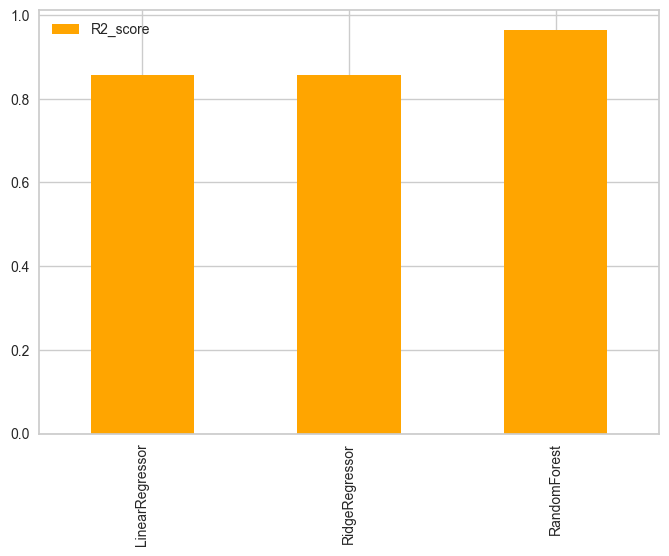

In [33]:
r2_scores = pd.DataFrame(data={"LinearRegressor":r2_score(y_test, ypred1),
             "RidgeRegressor":r2_score(y_test, ypred2),
             "RandomForest":r2_score(y_test, ypred3)}, index = ["R2_score"])
r2_scores.T.plot.bar(color='orange')

#### MEAN SQUARE ERROR

<Axes: >

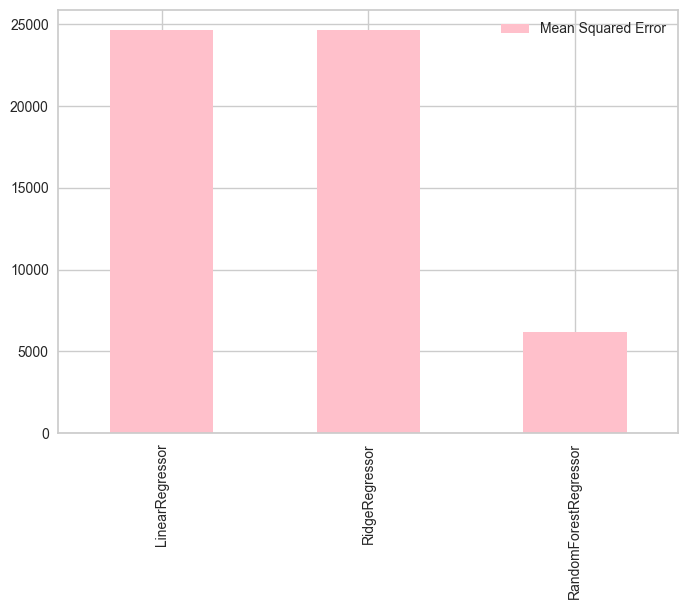

In [39]:
mse=pd.DataFrame(data={"LinearRegressor": mean_squared_error(y_test,ypred1), 
                       "RidgeRegressor": mean_squared_error(y_test, ypred2),
                       "RandomForestRegressor": mean_squared_error(y_test,ypred3)},index=["Mean Squared Error"])
mse.T.plot.bar(color='pink')

Among the three models the RandomForestRegressor() clearly dominates so we will be evluating on it further on.

## Model Evaluation

In [40]:
model=model3 #random forest model
ypred=ypred3

### 1.Evaluate Values manually

In [42]:
#this dataframe contains predicted and true value
values=pd.DataFrame(data={"Predicted":ypred, "Original":y_test, "Difference":ypred-y_test})
values.head()

,Predicted,Original,Difference
2730,764.660625,761.632498,3.028127
5859,664.296920,669.101136,-4.804216
3866,660.546426,649.962470,10.583956
492,1111.290827,1119.313635,-8.022808
4694,359.558782,355.226260,4.332522


### 2. Evaluate values by visualizer

The graph below plots PredictionError.

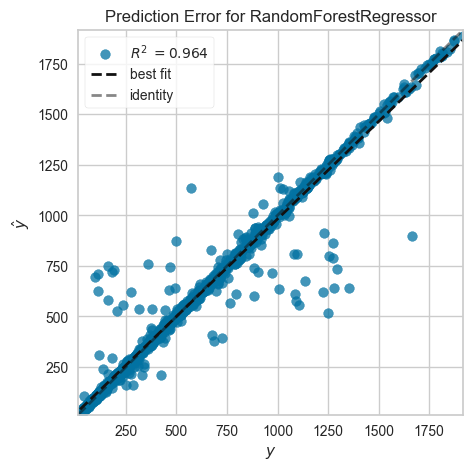

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [44]:
vis=PredictionError(model,size=(500,500))
vis.fit(x_train,y_train)
vis.score(x_test,y_test)
vis.poof()

### 3. Evaluating using cross_val_score

cross_val_score takes different pairs of Test and Train data. And gives scores for them.

In [46]:
np.random.seed(42)
cross_val_score(model,X,Y,cv=3,scoring=None)

array([0.97005905, 0.94838501, 0.9935745 ])

## Predicting Values using Test Data

In [48]:
cleaned_test = pd.read_csv("final_test.csv")
cleaned_test.head()

,Stock Index,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Industry,Index
0,AC3235,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.800000,4.66,3,2
1,AC3236,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.860000,6.11,0,1
2,AC3237,567.75,1461.00,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.930000,4.99,2,4
3,AC3238,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.090000,1.26,1,2
4,AC3239,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,0.938828,6.18,3,3


In [49]:
np.random.seed(42)
predicted = model.predict(cleaned_test.drop("Stock Index",axis=1))
# Stock Index is not included while predicting because it isnt used for training t

In [51]:
ans = pd.DataFrame(predicted,index=cleaned_test['Stock Index'],columns=["Predicted Values"])
ans.to_csv("output.csv")
ans

,Predicted Values
Stock Index,
AC3235,808.898386
AC3236,253.677994
AC3237,1566.568211
AC3238,830.149925
AC3239,270.694062
...,...
AD2734,134.889880
AD2735,611.023732
AD2736,463.955242
